In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar

In [20]:
class Schrodinger:
    
    def __init__(self,a,b,N,V):
        
        self.x=np.linspace(a,b,N)
        h = self.x[1]-self.x[0]
        plt.plot(self.x,V(self.x))
        
        T = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -2
                elif np.abs(i-j)==1:
                    T[i,j]=1

        self.T = T
        
        V_i = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    V_i[i,j]= V(self.x[i])
                    
                    
        self.V_i = V_i
        
        self.H = -0.5*(6.582119624 *10**(-16))**2 / (207*0.510998928*10**(6))*9*10**(16) *self.T/(h**2) + self.V_i
        
        self.val,self.vec=np.linalg.eig(self.H)
        

        

    def Phi(self,n):


        phi=[]
        for i in range(n):
            phi.append([])
        for i in range(n):
            phi[i] = np.append(phi[i],self.vec[:,np.argsort(self.val)[0:n][i]])
            phi[i] = np.append(phi[i],0)
            phi[i] = np.insert(phi[i],0,0)

        self.phi = phi
        for i in range(n):
            fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,10))  
            ax1.plot(self.x,self.phi[i])
            ax1.set(xlabel="x", ylabel="$\psi(x)$",title="Función de onda para n=%3.0f"%(i+1))
            ax1.grid()
            ax2.plot(self.x,abs(self.phi[i])**2)
            ax2.set(xlabel="x", ylabel="$|\psi(x)|^{2}$",title="Modulo al cuadrado de la función de onda para n=%3.0f"%(i+1))
            ax2.grid()
            plt.show()

In [21]:
def  Vpot(x):
    y=np.piecewise(x, [x < -10**(-10), x >= 10**(-10)],[lambda x:200, lambda x:200])
    return y

def Vpot_inf(x):  # Pozo de potencial infinito
    y=np.piecewise(x, [x < -1*10**(-10), x >= 1*10**(-10)],[lambda x:10**32, lambda x:10**32])
    return y

def oscilador(x):
    return ((1.2*10**22)**2)*207*((0.510998928*10**(6))/(9*10**(16)))*0.5*x**2

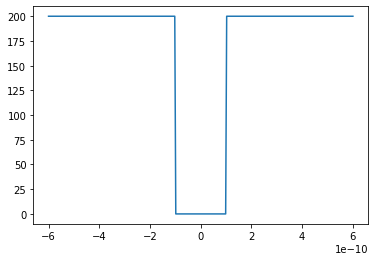

In [12]:
a = Schrodinger(-6*10**(-10),6*10**(-10),300,Vpot)

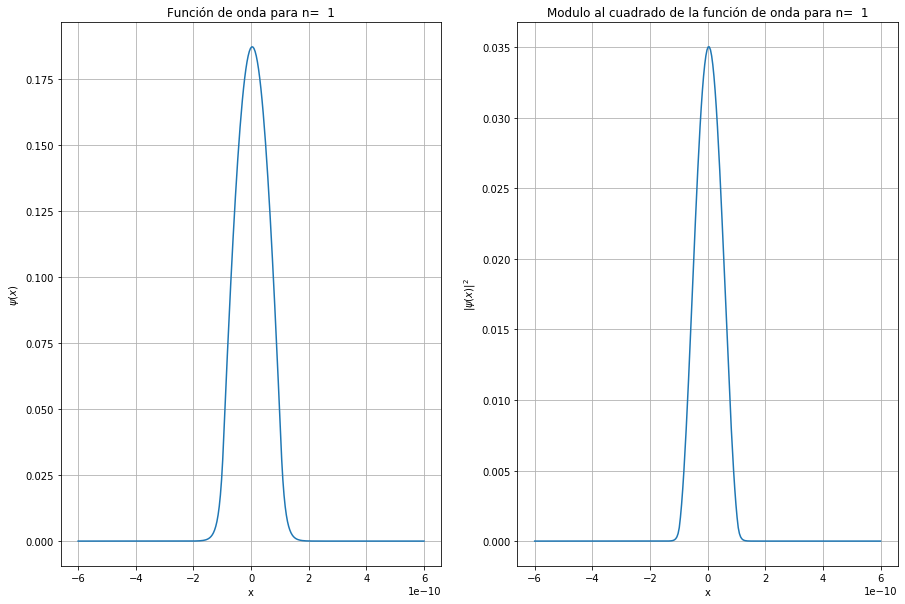

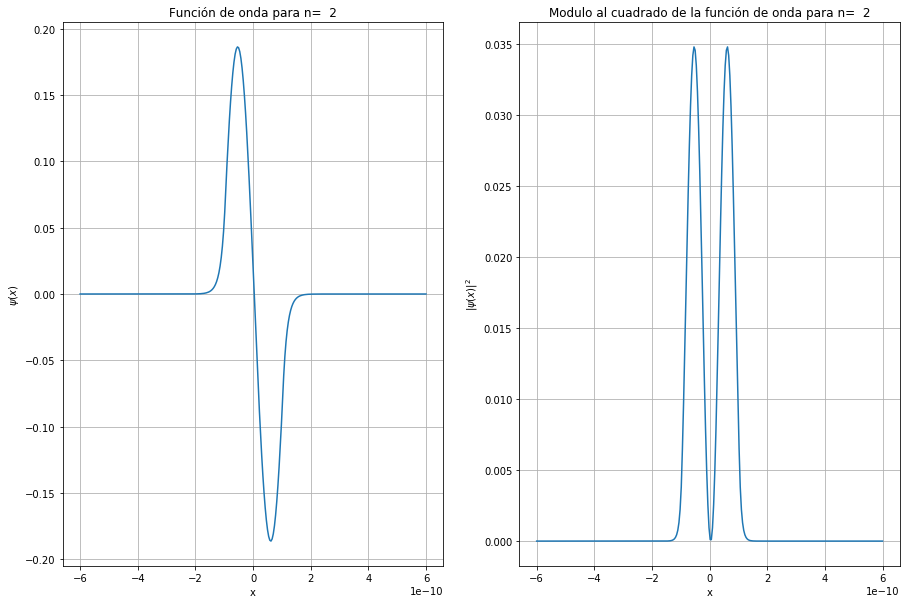

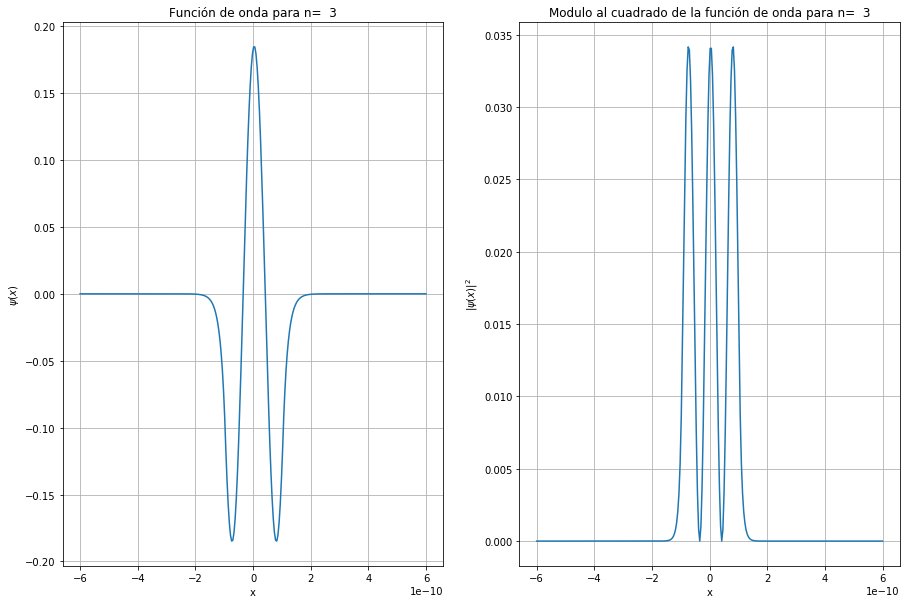

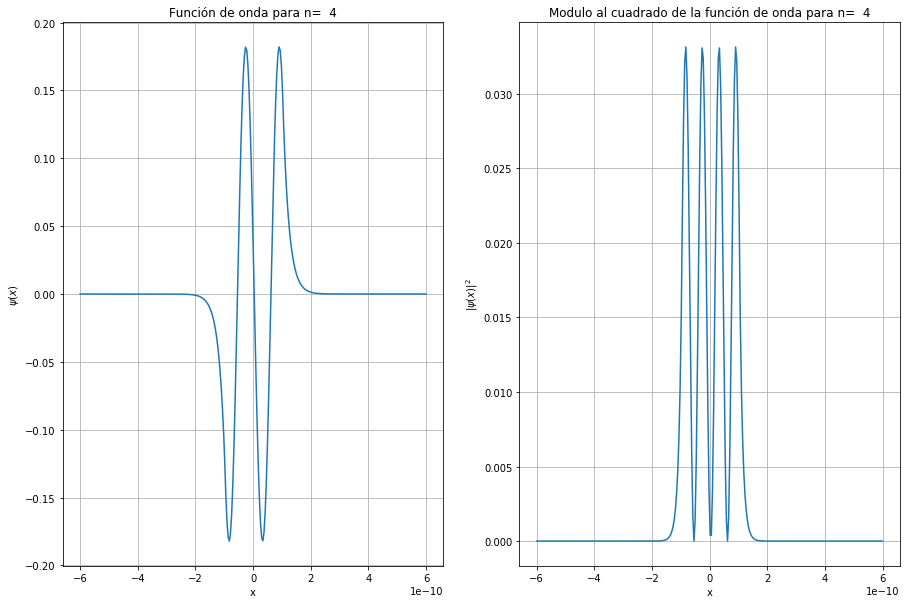

In [13]:
a.Phi(4)

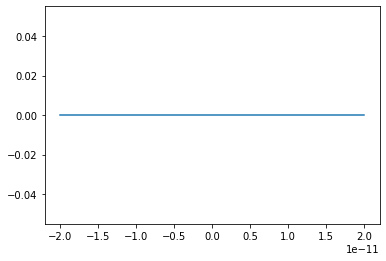

In [28]:
b = Schrodinger(-2*10**(-10),2*10**(-10),300,Vpot_inf)

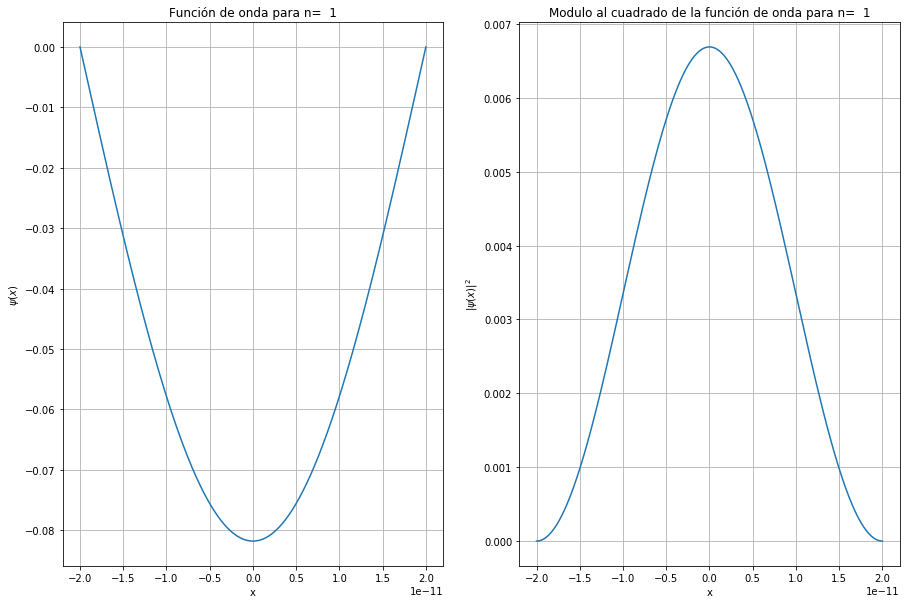

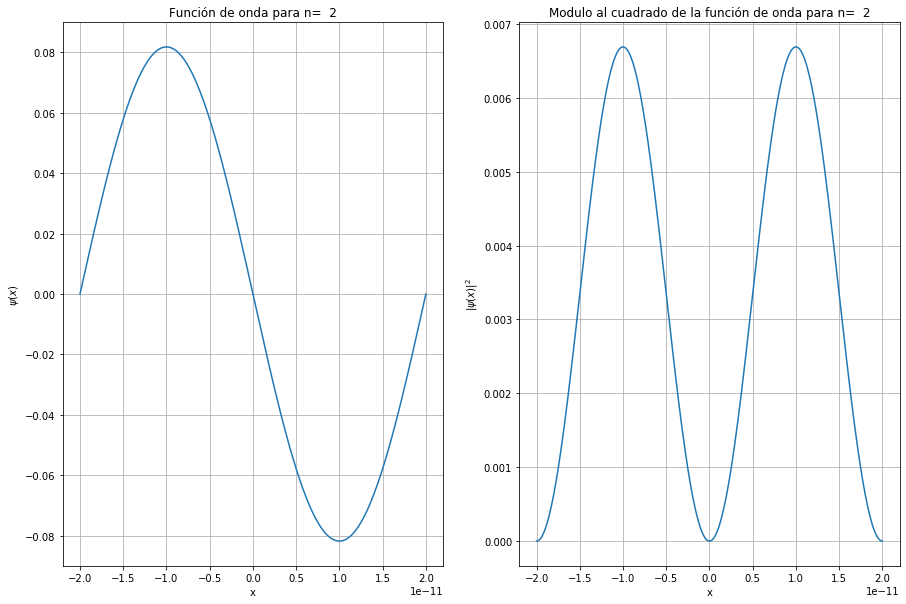

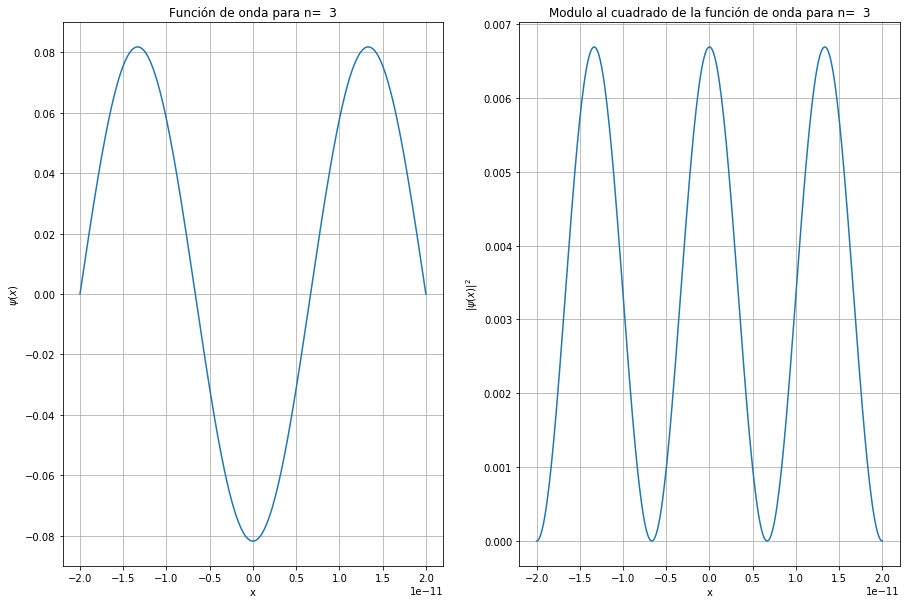

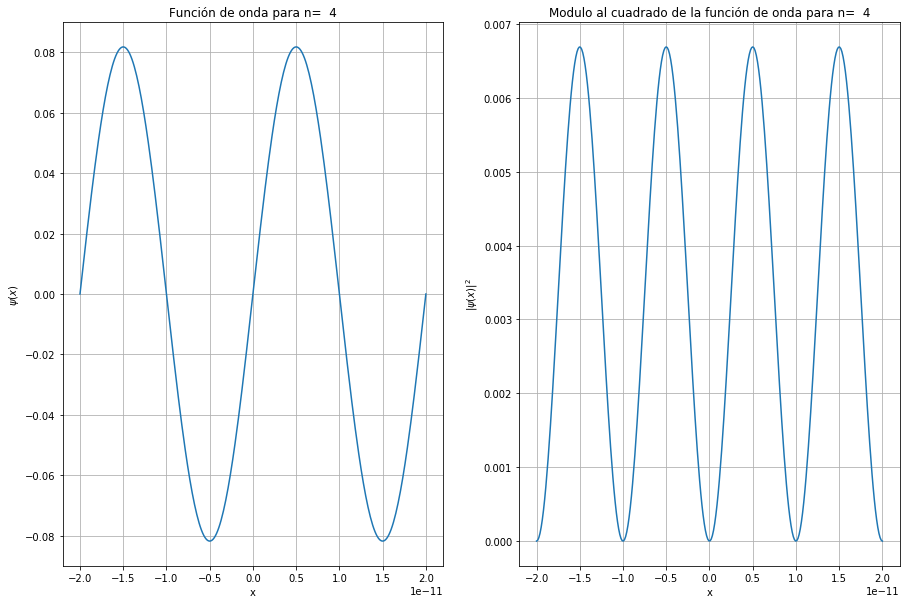

In [29]:
b.Phi(4)

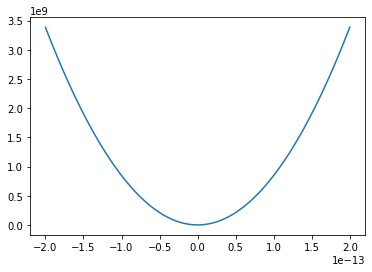

In [67]:
c = Schrodinger(-2*10**(-13),2*10**(-13),1000,oscilador)

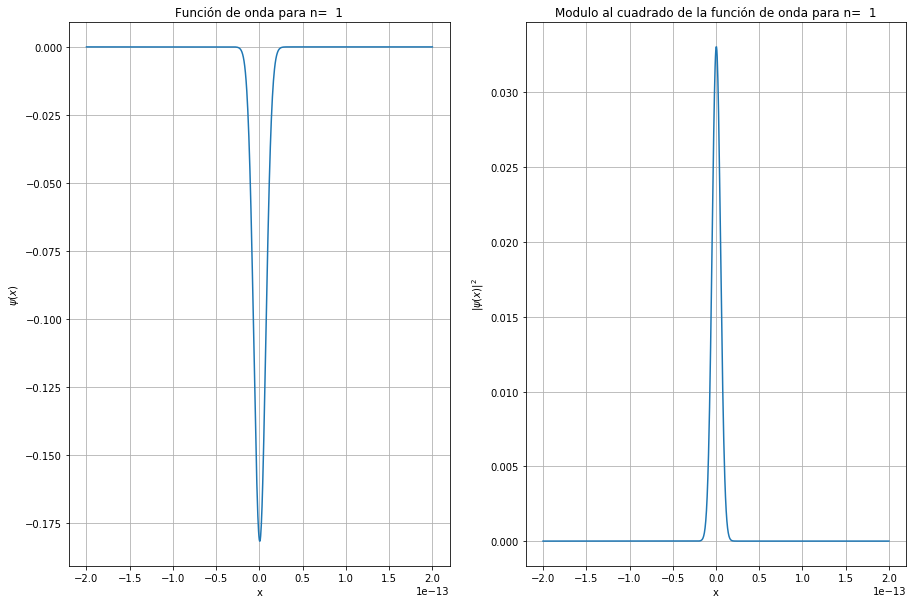

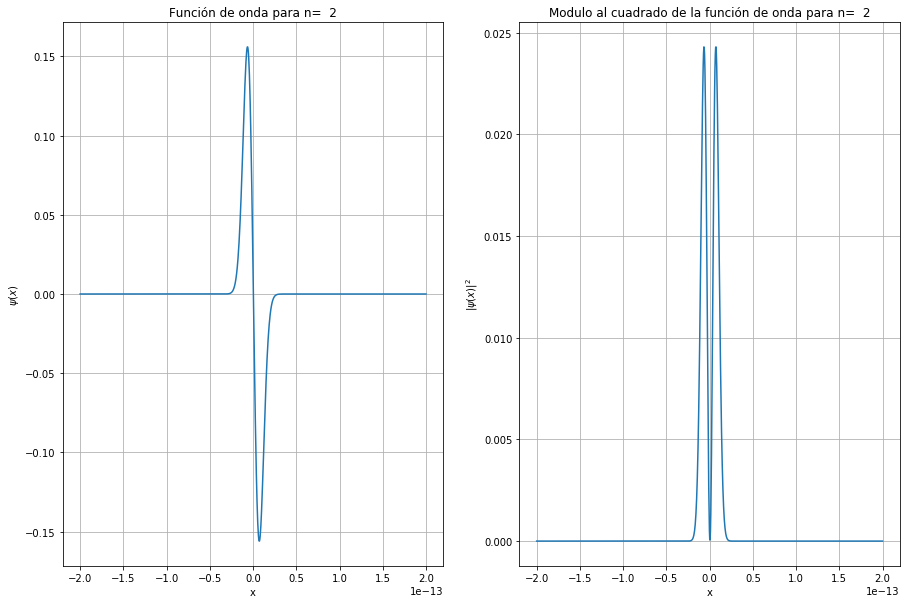

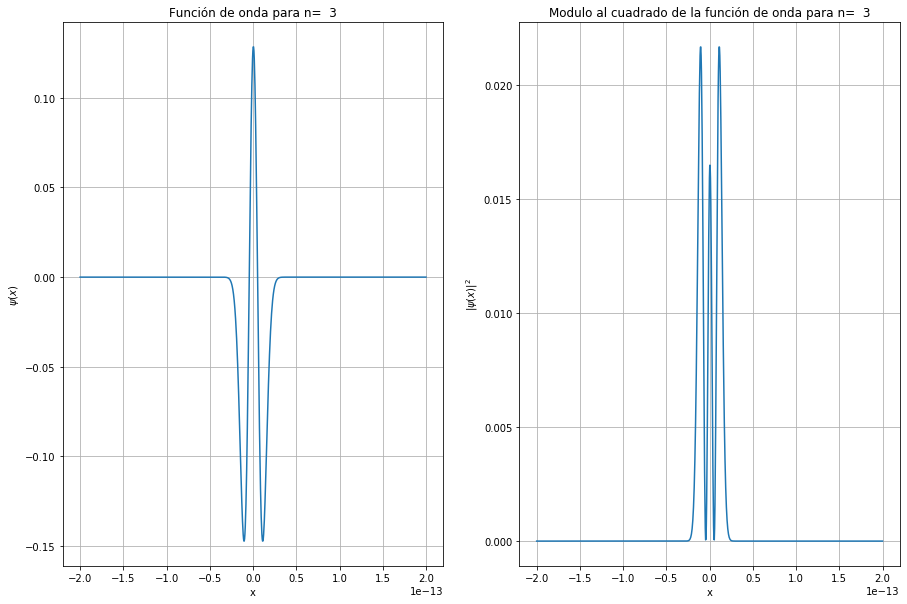

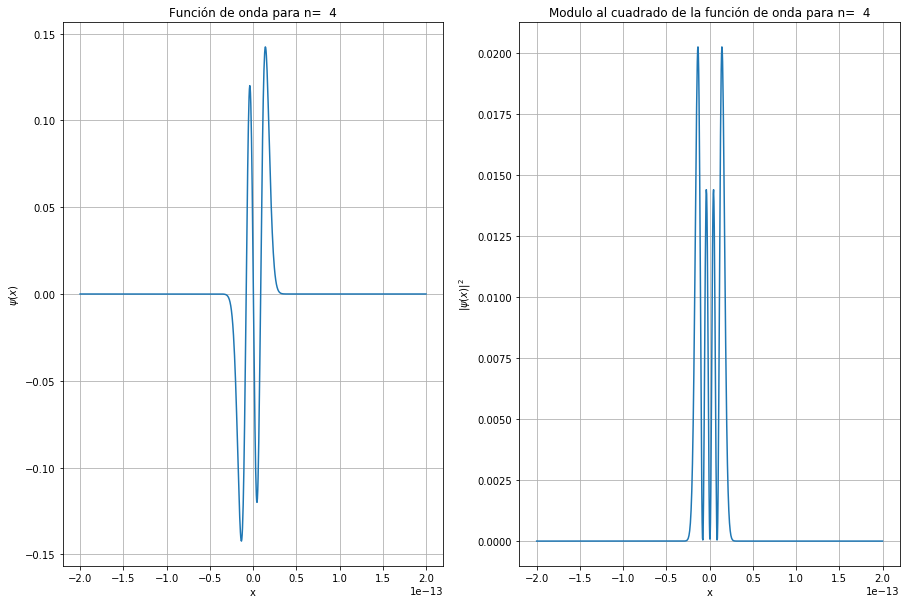

In [68]:
c.Phi(4)

In [69]:
c.val[np.argsort(c.val)][0:4]

array([ 3948423.68303751, 11843574.137045  , 19735329.67109073,
       27623688.09120185])